<a href="https://colab.research.google.com/github/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/blob/main/HW1/HW1_Logistic_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 1: LOGISTIC REGRESSION IMPLEMENTATION



## MACHINE LEARNING PROBLEM

Heart disease is one of the top leading cause of death in the world. Most heart diseases are not genetical and they develop through years. Therefore, there is a need to predict potential future patients with heart disease. The objective is to develop a model able to predict if a particular patient will have heart disease in the future or not based on a limit number of information from the patient. Logistic regression is used in this notebook in an effort to solve this problem. Logistic regression is able to clasify the data into labels, in this case 'absence' or 'presence' of heart disease. The performance of the model depends on the relationship between the parameters and the target. If this relationship is linear, the model will perform correctly; otherwise, it may result in underfitted models.

## PRE-PROCESSING AND EXPLORATORY DATA ANALYSIS 

Data sets are given in different formats and shapes. The data set is provided by the University of California Irvine's Machine Learning Repository ([Data](https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction)). A data dictionary is provided below. Pre-processing the data is crucial towards a smooth exploratory data analysis (EDA). A brief description of the pre-processing steps is described below. After pre-processing, an EDA is required to reveal the relevant aspects of the data set. This practice prevents feature dependecy issues, imbalanced data sets, irregular distributions of features undetected, among others. These issues lead to bias and overfitting. Relevant observations from the EDA analysis are described below. 



**Data dictionary**

* Age: Age of the patient
* Sex: 1 male and 0 for female
* Chest pain type (1: typical angina, 2: atypical angina,3: non-anginal pain, 4: asymptomatic)
* BP: Blood Pressure
* Cholesterol: Level of Cholesterol
* FBS over 120: Fasting blood glucose over 120 (1 = true, 0 = false)
* EKG results: level of heart block 
* Max HR: Maximum heart rate
* Exercise angina: exercise induced angina (1 = yes; 0 = no)
* ST depression: position of the ST segment
* ST slope: the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)
* Number of vessels fluro: number of major vessels (0-3) colored by flourosopy
* Thallium: Thallium stress test (3 = normal; 6 = fixed defect; 7 = reversable defect)
* Heart Disease: Patient heart disease condition

**Data Preprocessing**

The data set is provided in a .csv format. The following code will take care of the data pre-processing. Pandas library is used to read the data into a DataFrame. The column headers have spaces between words, those spaces are removed for data handling covenience. The presence and absence of heart disease outcomes are given in string format. This format is change to integers, having a patiente with presence heart disease as 1 and 0 otherwise. 

**Relevant Observations based on the Data Exploratory Analysis**

* The data has a total of 14 columns and 270 entries
* Do not present missing information
* The data is balanced (55% for heart disease presence and 45% for heart disease absence
* The pairwise relationship graph do not show any correlation among the independent variables. 
* Based on the features correlation graph: The heart disease outcome is highly correlated with the Thalium stress test and poorly correlated with the FBS over 120 feature. The method uses to compute the correlations is the pearson method which computes the standard correlation coefficient. 
* The data has 67% male entries and 33% female entries. In addition, 54% of the male entries present heart disease, while just 23% of the female entries present heart disease. 
* The distribution of the data by age is around 52 years old for female, while for male the mean is around 58. 
* By plotting the age and the Maximum heart rate (MHR) along with the heart disease condition, it can be seen that healthy patients tend to have a larger MHR with respect to unhealthy ones. In adittion, as the age increases the MHR decreases as well. 
* By just plotting the age and the Cholesterol along with the heart disease condition, a clear trend can not be depicted.


In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import time

In [ ]:
# data source: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
# note: we have combined Training and Testing data from Kaggle into a single data frame
df = pd.read_csv('https://raw.githubusercontent.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/main/HW1/Heart_Disease_Prediction.csv')
df.columns = [c.replace(' ', '_') for c in df.columns] #Some columns names have spaces, here spaces are replaced by '_'
mapping = {'Presence': 1, 'Absence': 0}
df = df.replace({'Heart_Disease': mapping})


In [ ]:
# Viewing first rows of the dataset 
df.head()

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
# Lets check the number of entries and features (columns) of our data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest_pain_type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS_over_120             270 non-null    int64  
 6   EKG_results              270 non-null    int64  
 7   Max_HR                   270 non-null    int64  
 8   Exercise_angina          270 non-null    int64  
 9   ST_depression            270 non-null    float64
 10  Slope_of_ST              270 non-null    int64  
 11  Number_of_vessels_fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart_Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [ ]:
# Checking data set size
df.shape

(270, 14)

In [ ]:
# Checking NaN values in the data
df.isna().sum()

Age                        0
Sex                        0
Chest_pain_type            0
BP                         0
Cholesterol                0
FBS_over_120               0
EKG_results                0
Max_HR                     0
Exercise_angina            0
ST_depression              0
Slope_of_ST                0
Number_of_vessels_fluro    0
Thallium                   0
Heart_Disease              0
dtype: int64

In [ ]:
# is the data imbalanced?
df.Heart_Disease.value_counts(normalize=True) #normalizes the result

# Data is not imbalanced

0    0.555556
1    0.444444
Name: Heart_Disease, dtype: float64

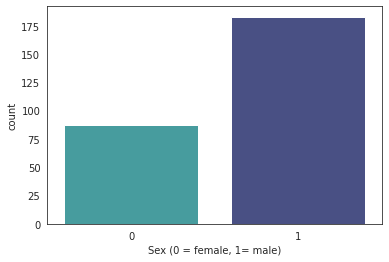

Percentage of Female Patients: 32.22%
Percentage of Male Patients: 67.78%


In [ ]:
sns.countplot(x='Sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()
countFemale = len(df[df.Sex == 0])
countMale = len(df[df.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.Sex))*100)))

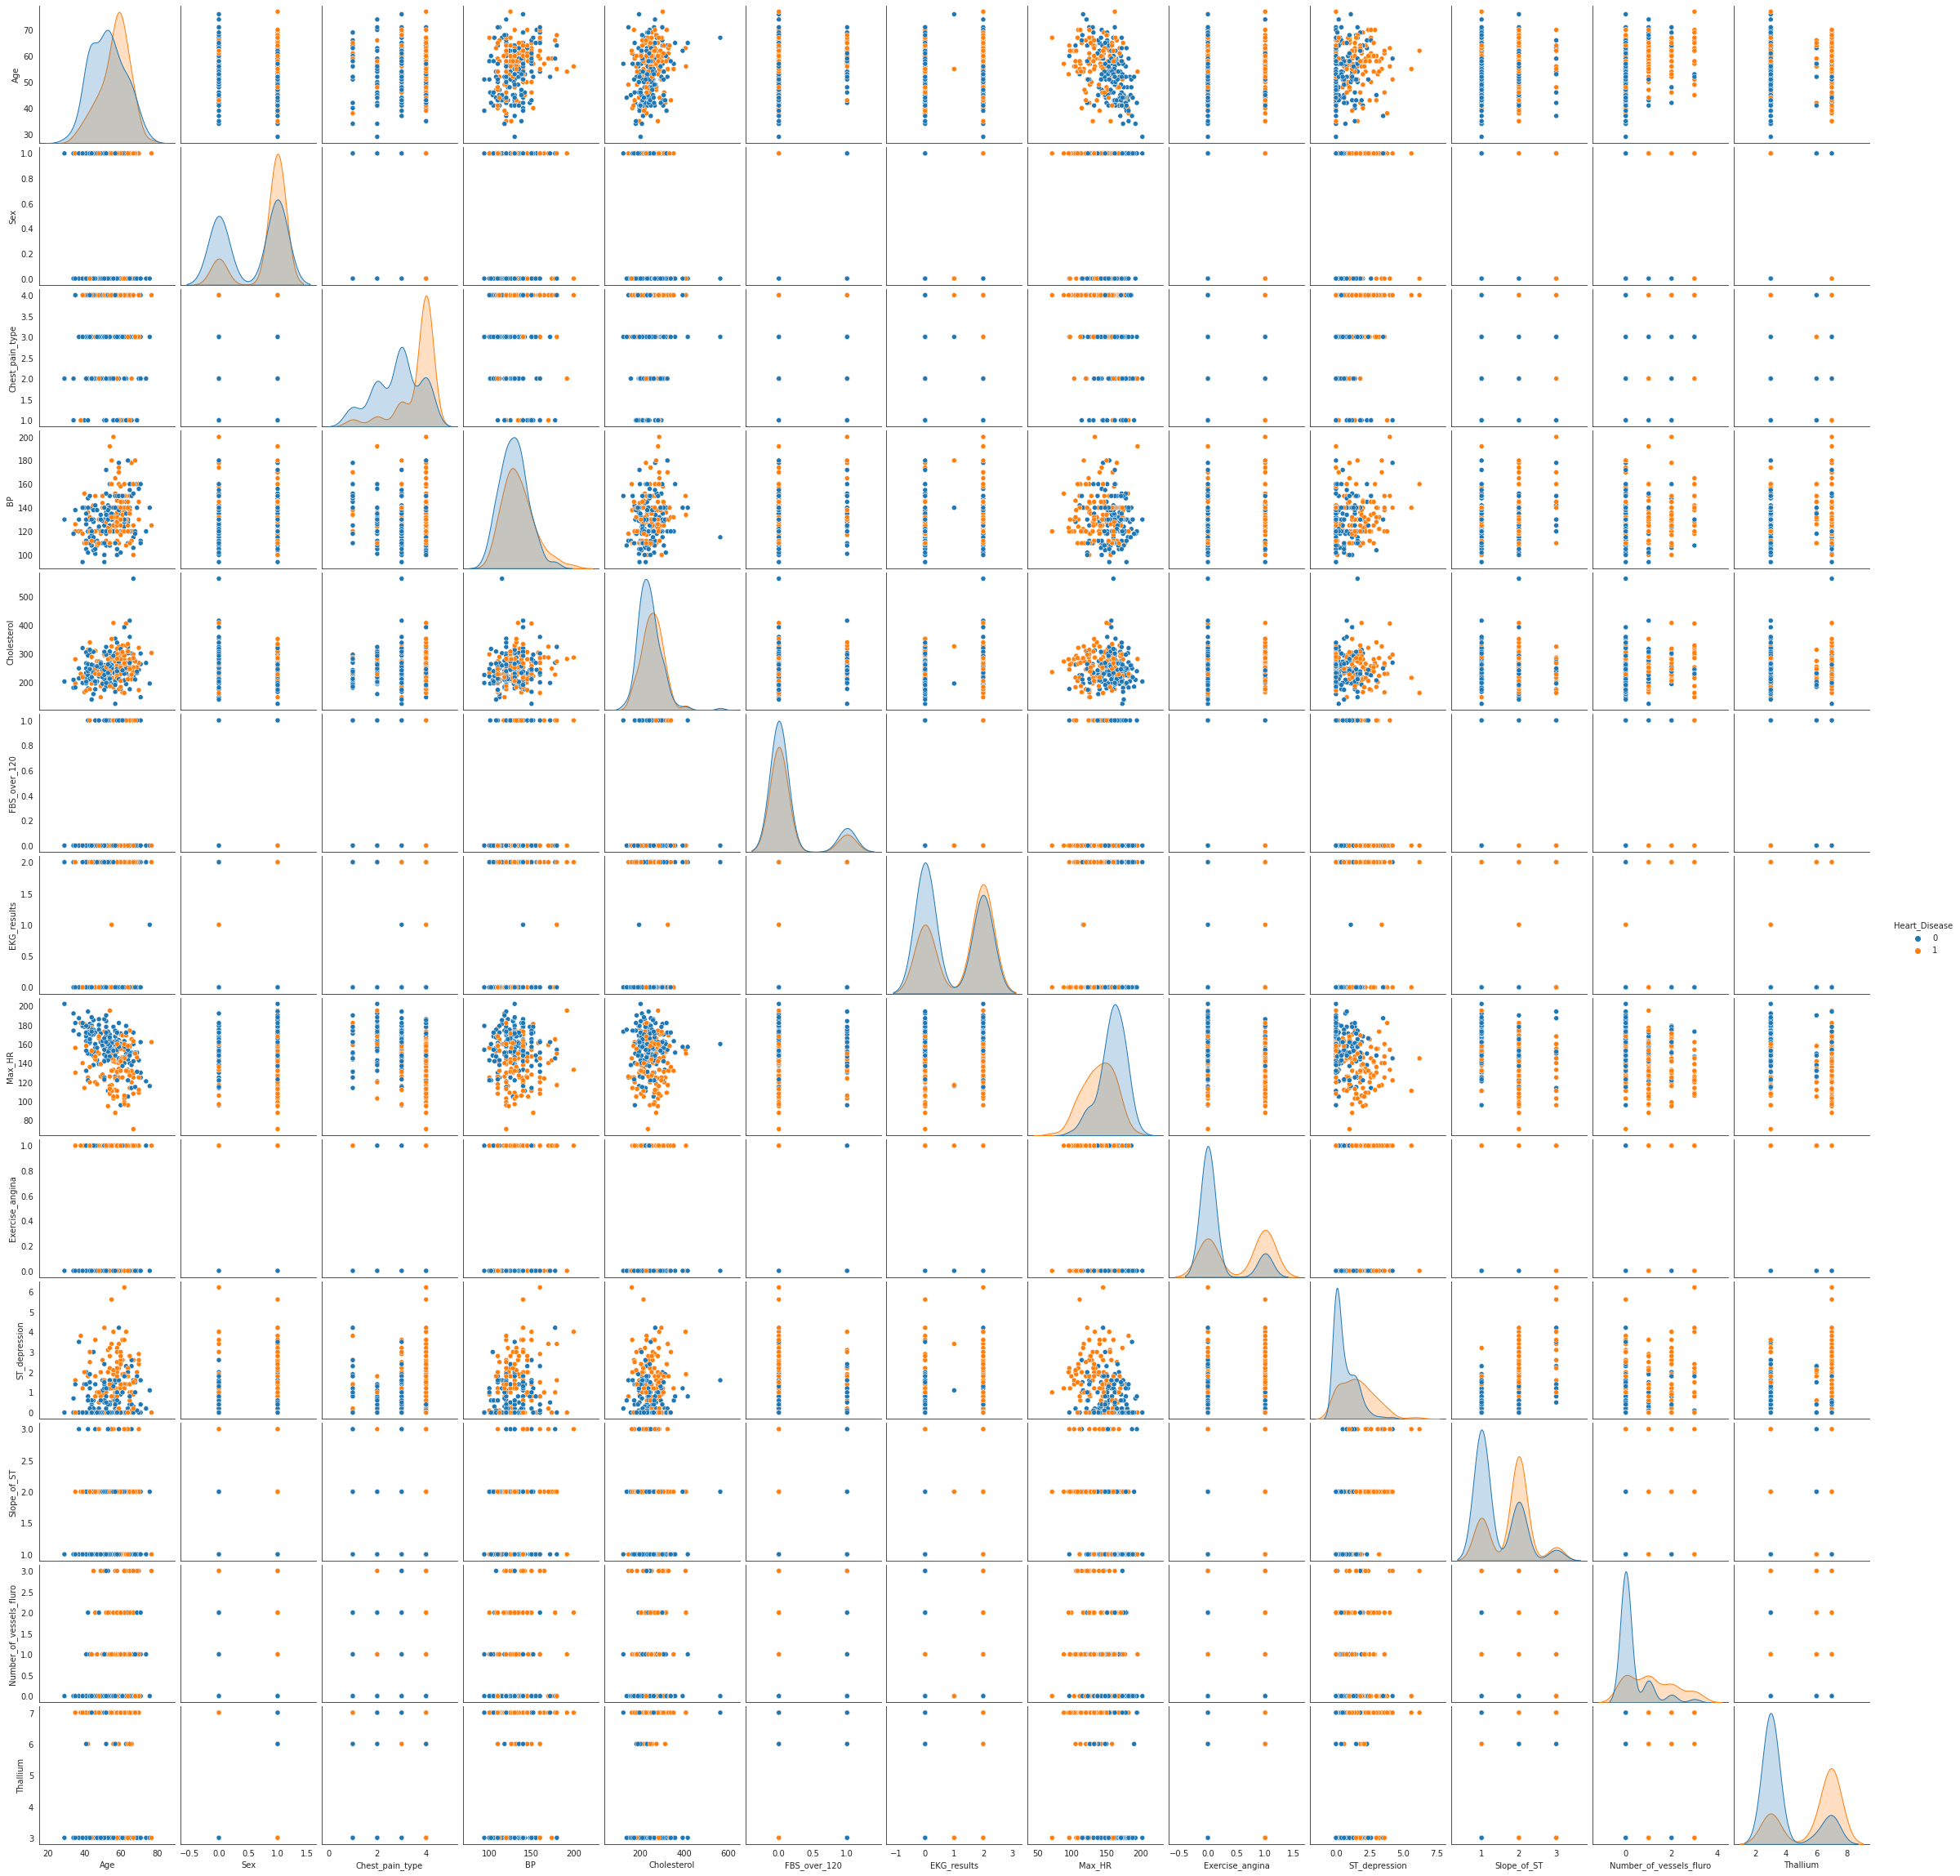

In [ ]:
# ploting pairwise relationships in the dataset
sns.pairplot(df, hue='Heart_Disease')

''

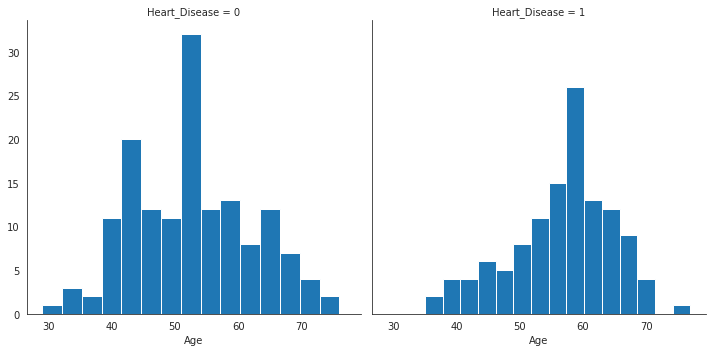

In [ ]:
# useful for visualizing the distribution of the data
g = sns.FacetGrid(df, col='Heart_Disease', height=5)
g.map(plt.hist, 'Age', bins=15)
,

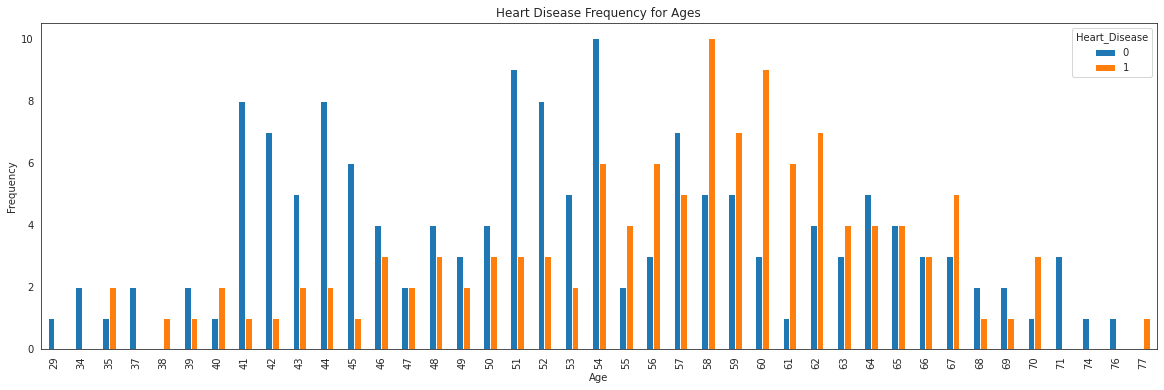

In [ ]:
pd.crosstab(df.Age,df.Heart_Disease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# useful for splitting the data into groups and aggregating them using different operators (e.g. sum or size)
# here we split dataset by Sex and get the size (i.e. count) for each group 
df.groupby('Sex').size()

Sex
0     87
1    183
dtype: int64

In [ ]:
# here we split dataset by Pclass and get the mean value of Survived for each group 
# (i.e. the probability of surviving for each Pclass group) 
df[['Sex', 'Heart_Disease']].groupby(['Sex'], as_index=False).mean().sort_values(by='Heart_Disease', ascending=False)

,Sex,Heart_Disease
1,1,0.546448
0,0,0.229885


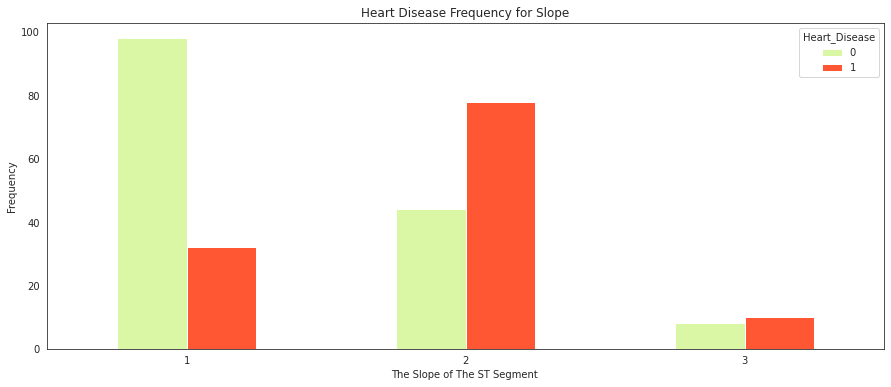

In [ ]:
pd.crosstab(df.Slope_of_ST,df.Heart_Disease).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

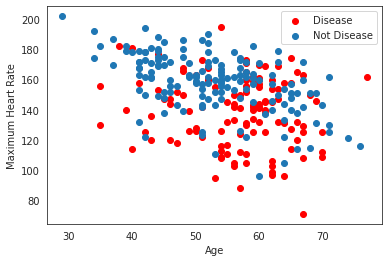

In [ ]:
plt.scatter(x=df.Age[df.Heart_Disease==1], y=df.Max_HR[(df.Heart_Disease==1)], c="red")
plt.scatter(x=df.Age[df.Heart_Disease==0], y=df.Max_HR[(df.Heart_Disease==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

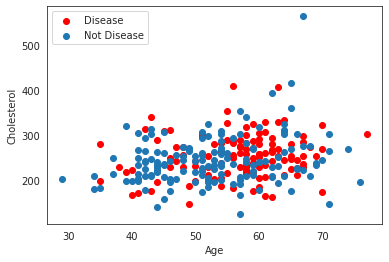

In [ ]:
plt.scatter(x=df.Age[df.Heart_Disease==1], y=df.Cholesterol[(df.Heart_Disease==1)], c="red")
plt.scatter(x=df.Age[df.Heart_Disease==0], y=df.Cholesterol[(df.Heart_Disease==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

''

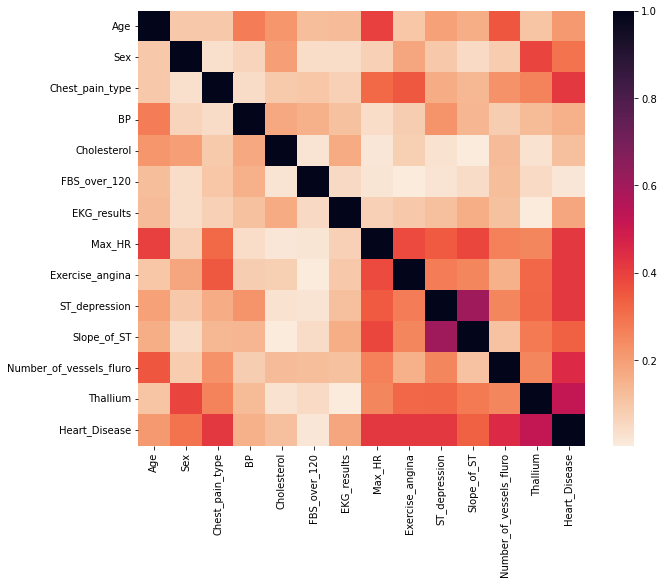

In [ ]:
# Correlation among features along with the the dependent variable
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')
,

## LOGISTIC REGRESSION ALGORITHMS IMPLEMENTION

This section presents the implemention of the Logistic Regression model using the numpy library. The optimization algorithm choose for this work is gradient descent. Two variants of the algorithm were choosen: Batch gradient descent and Mini-batch gradient descent. Additionaly, two optimization algorithms were also implemented in this work: Gradient Descent with Momentum and Adptive Moment Estimation (Adam). 

For theoretical background of the gradient descent algorithms please refer to [Paper 1](https://arxiv.org/pdf/1609.04747.pdf) and [Coursera playlist](https://youtube.com/playlist?list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc)

This implementation was previously tested with a synthetic data set [Logistic_Regression_from_scratch](https://github.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/blob/1675e4186924a508dd6a87de1168f652f45e042a/HW1/Logistic_Regression_from_scratch.ipynb).

### ALGORITHMS IMPLEMENTED

In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
import time



In [ ]:
# First, let's define the sigmoid function for the logistic regression problem
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# compute_cost: computes the cost using the Binary Cross Entropy function. This 
# function guarantee the cost function to have a convex shape. 
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1/m)*(((-y).T @ np.log(h))-((1-y).T @ np.log(1-h))) # Binary Cross Entropy Function
    return cost

In [ ]:
# batch gradient descent: Implement gradient descent algorithm to the whole
# data set. The learning rate and number of interations are required here as 
# inputs. 

def batch_gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        dum = (sigmoid(X @ params) - y)
        params = params - (learning_rate/m) * (X.T @ dum) #Updating parameters
        cost_history[i] = compute_cost(X, y, params) # saving cost historical values in a matrix

    return (cost_history, params)

In [ ]:
# mini batch gradient descent: Splits the data set in mini batches and learn 
# from each mini batch. The learning rate, number of interations and the mini 
# batch size are required here as inputs. 

def mini_batch_gradient_descent(X, y, params, learning_rate, iterations,mbs):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    n_batches = int(m/mbs)
    
    for j in range(iterations):
        cost_i = 0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,mbs):
            X_i = X[i:i+mbs]
            y_i = y[i:i+mbs]
            dum = (sigmoid(X_i @ params) - y_i)
            params = params - (learning_rate/m) * (X_i.T @ dum) #Updating parameters
            cost_i += compute_cost(X_i, y_i, params) # saving cost historical values in a matrix
        cost_history[j] = cost_i
    return (cost_history, params)

**batch gradient descent with momentum**: Takes into account the previous gradients, avoiding large oscilations and allowing larger steps in the axis in which it is clear the algorithm is moving towards the minimum. 

In [ ]:


def gradient_descent_mom(X, y, params, learning_rate, iterations,Beta1):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    nu = np.zeros((len(params),1))
    for i in range(iterations):
        dum = (sigmoid(X @ params) - y)
        dJ = (X.T @ dum)/m
        nu = Beta1*nu + (learning_rate) * dJ
        params = params - nu #Updating parameters
        cost_history[i] = compute_cost(X, y, params) # saving cost historical values in a matrix
      
    return (cost_history, params)

In [ ]:
# The optimization used in this case is mini batch gradiant descent. The learning rate 
# and number of interations are required here as inputs. 

def mini_batch_gradient_descent_mom(X, y, params, learning_rate, iterations,mbs,Beta1):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    n_batches = int(m/mbs)
    nu = np.zeros((len(params),1))
    for j in range(iterations):
        cost_i = 0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,mbs):
            X_i = X[i:i+mbs]
            y_i = y[i:i+mbs]
            dum = (sigmoid(X_i @ params) - y_i)
            dJ = (X_i.T @ dum)/m
            nu = Beta1*nu + (learning_rate) * dJ
            params = params - nu #Updating parameters
            cost_i += compute_cost(X_i, y_i, params) # saving cost historical values in a matrix
        cost_history[j] = cost_i
    return (cost_history, params)

**mini batch gradient descent with Adam**: Takes into account the previous gradients. Uses the first moment (mean) and second moment (variance) of the gradients to compute the subsequent gradient.

In [ ]:
# The optimization used in this case is mini batch gradiant descent. The learning rate 
# and number of interations are required here as inputs. 

def mini_batch_gradient_descent_Adam(X, y, params, learning_rate, iterations,mbs,Beta1,Beta2):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    n_batches = int(m/mbs)
    vt = np.zeros((len(params),1))
    mt = np.zeros((len(params),1))
    for j in range(iterations):
        cost_i = 0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0, m,mbs):
            X_i = X[i:i+mbs]
            y_i = y[i:i+mbs]
            dum = (sigmoid(X_i @ params) - y_i)
            dJ = (X_i.T @ dum)/m
            mt = Beta1*mt + (1-Beta1) * dJ
            vt = Beta2*vt + (1-Beta2) * dJ**2
            mt_ = mt/(1-Beta1**(j+1))
            vt_ = vt/(1-Beta2**(j+1))
            params = params - ((learning_rate) * mt_ / (np.sqrt(vt_) + 10**-6)) #Updating parameters
            cost_i += compute_cost(X_i, y_i, params) # saving cost historical values in a matrix
        cost_history[j] = cost_i
    return (cost_history, params)

In [ ]:
# Lets define a predict function for new X input data using the optimal parameters
# If prediction < 0.5 --> 0 or absence
# If prediction >= 0.5 --> 1 or presence

def predict(X, params):
    return np.round(sigmoid(X @ params))

In [ ]:
def f1_score(y_act,y_model):
    
  tp = sum((y_act==1) & (y_model==1))
  tn = sum((y_act==0) & (y_model==0))
  fn = sum((y_act==1) & (y_model==0))
  fp = sum((y_act==0) & (y_model==1))
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1 = 2*(precision*recall)/(precision+recall)
  return f1

## APPLYING LOGISTIC REGRESSION TO DATA SET

The data set is provided in a .csv format. The following code will take care of the data pre-processing. Pandas library is used to read the data into a DataFrame. The column headers have spaces between words, those spaces are removed for data handling covenience. The presence and absence oh heart disease outcomes are given in string format. This format is change to integers, having a patiente with presence heart disease as 1 and 0 otherwise. After that the data is re format into 2D-numpy arrays. X is the independent variables and y is the dependent variable (heart disease condition). 

In [ ]:
# data source: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
# note: we have combined Training and Testing data from Kaggle into a single data frame
df = pd.read_csv('https://raw.githubusercontent.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/main/HW1/Heart_Disease_Prediction.csv')
df.columns = [c.replace(' ', '_') for c in df.columns] #Some columns names have spaces, here spaces are replaced by '_'
mapping = {'Presence': 1, 'Absence': 0}
df = df.replace({'Heart_Disease': mapping})

y = df['Heart_Disease']
X = df[['Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol', 'FBS_over_120',
        'EKG_results', 'Max_HR', 'Exercise_angina', 'ST_depression',
        'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium']]
m = len(y)
n = np.size(X,1)
X = np.hstack((np.ones((m,1)),X))
y = y[:,np.newaxis]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app


### batch gradient descent is implemented: 

Here 10000 iterations are used along with a learning rate equal to 0.0001. The curve starts with a cost equal to 0.69. The reason behind this value is because all the parameters are initially set to 0 leading to an error equal to ln(0.5) independently of the data. After this the curve stars increasing and then the gradient descent algorithm leads the parameters to the global minimum. Finally the curve settle down and the algorithm is stopped at 10000 iterations, the cost value found at this step is equal to 0.45. The execution time is 0.771 s

Time: 0.708188533782959


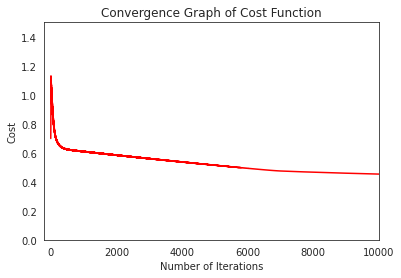

In [ ]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 10000
learning_rate =0.0001

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history, params_optimal) = batch_gradient_descent(X, y, params, 
                                 learning_rate, iterations)

end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim(-200, 10000)
plt.ylim(0,1.5)
plt.show()


In [ ]:
cost_history[-1]

array([0.45331344])

### mini batch gradient descent is implemented: 

Here 10000 iterations are used along with a learning rate equal to 0.0001, the mini batch size is set equal to 2^7 = 128. This time the curve does not start with a cost equal to 0.69. This is because the parameters were updated several times during the first iteration. The gradient descent algorithm leads the parameters to the global minimum, however, a considerable oscillation is seen. This may be solved with a smaller learning rate. The total execution time is 1.877 s. More than two times with respect to the execution time obtained with batch gradient descent. This is because mini batch gradient descent it is useful for large data sets. Our current data set has 270 entries, which is a small data set. In our case, mini batch gradient descent is loosing the advantage of the vectorization form. 

Due to the size of our data set, mini batch gradient descent with a mini batch size equal to the data set is selected (this is equivalent to use batch gradient descent). 

Time: 1.700282335281372


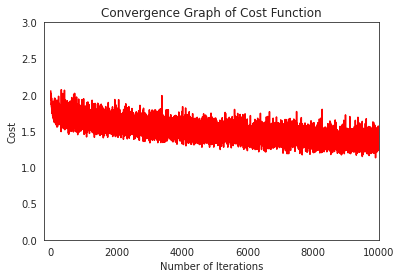

In [ ]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 10000
learning_rate =0.0001

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history, params_optimal) = mini_batch_gradient_descent(X, y, params, 
                                 learning_rate, iterations,mbs = 128)
end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim(-200, 10000)
plt.ylim(0,3)
plt.show()

Time: 1.0692894458770752


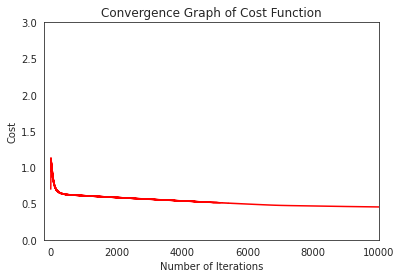

In [ ]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 10000
learning_rate =0.0001

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history_mb, params_optimal) = mini_batch_gradient_descent(X, y, params, 
                                 learning_rate, iterations,mbs = 280)
end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history_mb)), cost_history_mb, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim(-200, 10000)
plt.ylim(0,3)
plt.show()

### OPTIMIZATION ALGORITHMS: MOMENTUM and ADAM
**batch gradient descent with momentum**: Takes into account the previous gradients, avoiding large oscilations and allowing larger steps in the axis in which it is clear the algorithm is moving towards the minimum. 

**mini batch gradient descent with Adam**: Takes into account the previous gradients. Uses the first moment (mean) and second moment (variance) of the gradients to compute the subsequent gradient.

Time: 1.108581781387329


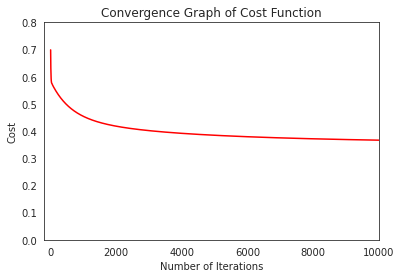

In [ ]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1))
iterations = 10000
learning_rate =0.0001

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history_mom, params_optimal) = mini_batch_gradient_descent_mom(X, y, params, 
                                 learning_rate, iterations,mbs=300,Beta1=0.9)

end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history_mom)), cost_history_mom, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim(-200, 10000)
plt.ylim(0,0.8)
plt.show()

Time: 1.2415130138397217


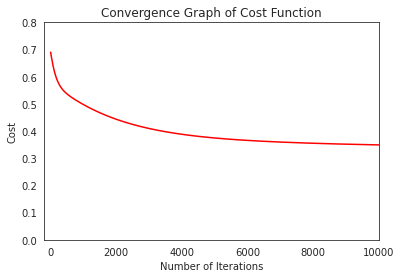

In [ ]:
m = len(y)
n = np.size(X,1)
params = np.zeros((n,1)) 
iterations = 10000
learning_rate =0.0001

initial_cost = compute_cost(X, y, params)

start = time.time()
(cost_history_adam, params_optimal) = mini_batch_gradient_descent_Adam(X, y, params, 
                                 learning_rate, iterations,mbs=300,Beta1=0.9,Beta2=0.999)

end = time.time()
print('Time:',end - start)
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history_adam)), cost_history_adam, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim(-200, 10000)
plt.ylim(0,0.8)
plt.show()

## COMPARISON OF OPTIMIZATION ALGORITHM PERFORMANCE

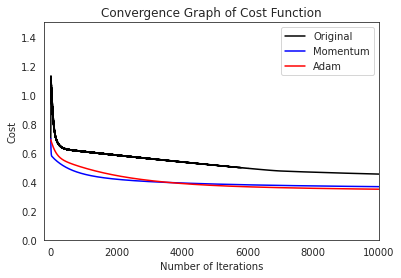

In [ ]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history_mb)), cost_history_mb, 'k', label='Original')
plt.plot(range(len(cost_history_mom)), cost_history_mom, 'b', label='Momentum')
plt.plot(range(len(cost_history_adam)), cost_history_adam, 'r', label='Adam')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend(loc='upper right')
plt.xlim(-200, 10000)
plt.ylim(0,1.5)
plt.show()

The figure compares the original vanilla gradient descent performance along the momentum optimization and adam optimization. The original performance has an abrupt change at the beggining of the iteration process. This issue can be solved by decreasing the learning parameter. After that the curve decreases towards the minimum cost location the optimization is stopped at the step 10000 and a cost equal to 0.45 is found. The optimized methods (adam and momentum) do not have this oscilliation at the beggining of the curve, rather the cost continuously decrease along the number of interations. The momentum optimization has a smaller cost with respect to adam's results at the beggining of the curve, however after 4000 iterations, the cost obtained using adam's optimization is slightly smaller. At the 10000 iteration step the cost obtained with the momemtum optimization is 0.366 while the value obtained with adam optimization is 0.349. 

In conclusion, for this particular small data set, I recommend using the Adam optimization method. The diference in execution time between both of them is 1.24 s (momentum) - 1.10 (adam) equal to 0.14 s. For practical purposes this difference is not considerable. Therefore, the decision should be based on the optimization that gives you the smaller cost, which in this case is the Adam optimization. 



### Partitioning the Data and Model Validation Metric

Until now the whole data set has been used, however, any statistical model requires validation. One way to achieve this is by splitting the data into a training and test set. In the following code, the data is splitted, and two logistic regression models are fitted. The first one uses Adam optimization while the momemtum optimization is implemented to the second model. The performance is evaluated using the f1 score. 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
(cost_history_adam, params_optimal) = mini_batch_gradient_descent_Adam(X_train, y_train, params, 
                                 learning_rate, iterations,mbs=300,Beta1=0.9,Beta2=0.999)

y_model = predict(X_test,params_optimal)

f1_Adam = f1_score(y_test,y_model)
print('f1 score using Adam optimization',f1_Adam)

(cost_history_adam, params_optimal) = mini_batch_gradient_descent_mom(X_train, y_train, params, 
                                 learning_rate, iterations,mbs=300,Beta1=0.9)

y_model = predict(X_test,params_optimal)

f1_mom = f1_score(y_test,y_model)
print('f1 score using Momentum optimization',f1_mom)

f1 score using Adam optimization [0.87179487]
f1 score using Momentum optimization [0.86486486]


## CONCLUSIONS


A logistic regression model was successfully implemented to predict potential future patients with a heart condition disease based on some relevant information about the patient. The model was fitted based on a public data base. The data set was pre-processed, explore and analyzed before fitting a model. The features were deemed as independent among each other. The distribution and correlations with the dependent variable were also studied. Finally, The model was optimized using batch gradient descent and mini batch gradient descent along with momentum and Adam optimizations. The implemention from scratch of these methods were developed in this notebook. Both results were described and compared. The f1 score obtained using momentum and Adam's optimization are 0.864 and 0.871, respectively. The difference between both are not significant however Adam's optimization leads to a larger f1 score.  
